# Project: Investigate a Pima Indians Diabetes Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#pre">Prediction analysis (classification)</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> About Dataset:

>> Pregnancies: No. of times pregnant

>> Glucose: Plasma Glucose Concentration (mg/dl)

>> Blood Pressure: Diastolic Blood Pressure(mmHg)

>> Skin Thickness:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

>> Insulin: 2-Hour Serum Insulin (mu U/ml)

>> BMI: Body Mass Index (weight in kg/ height in m2)

>> Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

>> Age:Age (years)

>> Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [1]:
# this cell is used to set up import statements for all of the packages that we plan to use.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis.

### General Properties

In [2]:
# Loading our data and printing out a few lines.  
df = pd.read_csv("diabetes.csv")
df.index = np.arange(1, len(df) + 1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.340,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Performing operations to inspect our data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
# looking for instances of missing or possibly errant data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Cleaning

In [5]:
# replacing any 0 in Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age with None
df['Glucose'].replace([0], [None], inplace=True)
df['BloodPressure'].replace([0], [None], inplace=True)
df['SkinThickness'].replace([0], [None], inplace=True)
df['Insulin'].replace([0], [None], inplace=True)
df['BMI'].replace([0], [None], inplace=True)
df['DiabetesPedigreeFunction'].replace([0], [None], inplace=True)
df['Age'].replace([0], [None], inplace=True)

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
# forward fill NaN values down
# replace NaN values with the previous value in the column
df.fillna(method = 'ffill', axis = 0, inplace=True)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     3
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# drop remaining missing values
df.dropna(inplace=True)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# resulting data frame
df.index = np.arange(1, len(df) + 1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,89,66,23,94.0,28.1,0.167,21,0
2,0,137,40,35,168.0,43.1,2.288,33,1
3,5,116,74,35,168.0,25.6,0.201,30,0
4,3,78,50,32,88.0,31.0,0.248,26,1
5,10,115,50,32,88.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,10,101,76,48,180.0,32.9,0.171,63,0
762,2,122,70,27,180.0,36.8,0.340,27,0
763,5,121,72,23,112.0,26.2,0.245,30,0
764,1,126,60,23,112.0,30.1,0.349,47,1


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### how does every attribute affects the possibility of having diabetes ? 

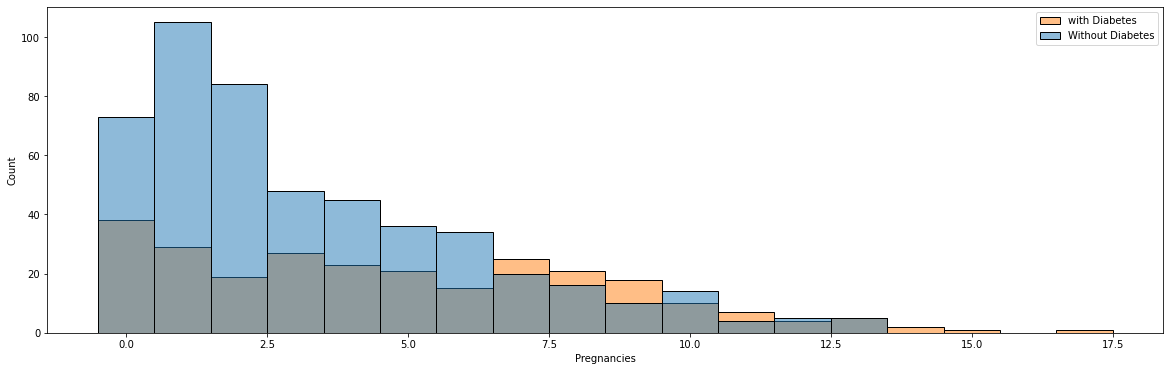

In [9]:
plt.figure(figsize=(20,6))
sns.histplot(x='Pregnancies',hue = 'Outcome', data=df, legend=True, discrete=True)
plt.legend(["with Diabetes", "Without Diabetes"])

> **Note**: from this graph we get that the numbert of people having diabetes nearly does not increase with the increase of number of Pregnancies but people with less number of Pregnancies have less chance to get diabestes because people with less than 3 Pregnancies that do not have diabetes are far more than people that have diabetes with less than 3 Pregnancies

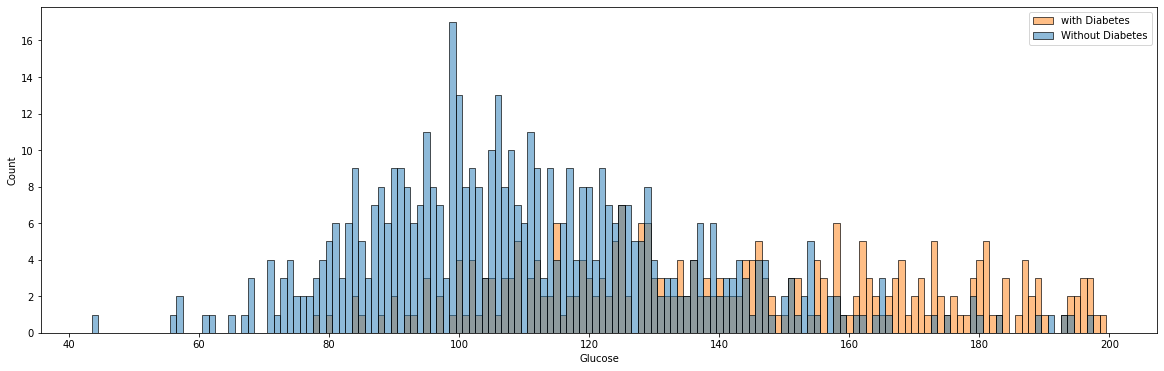

In [10]:
plt.figure(figsize=(20,6))
sns.histplot(x='Glucose',hue = 'Outcome', data=df, legend=True, discrete=True)
plt.legend(["with Diabetes", "Without Diabetes"])

> **Note**: from this graph we get that the numbert of people that does not have diabetes decreases with the increase of Glucose so people with more Glucose have more chance to get diabestes. because most of the people that has more that 150 Glucose have diabetes.

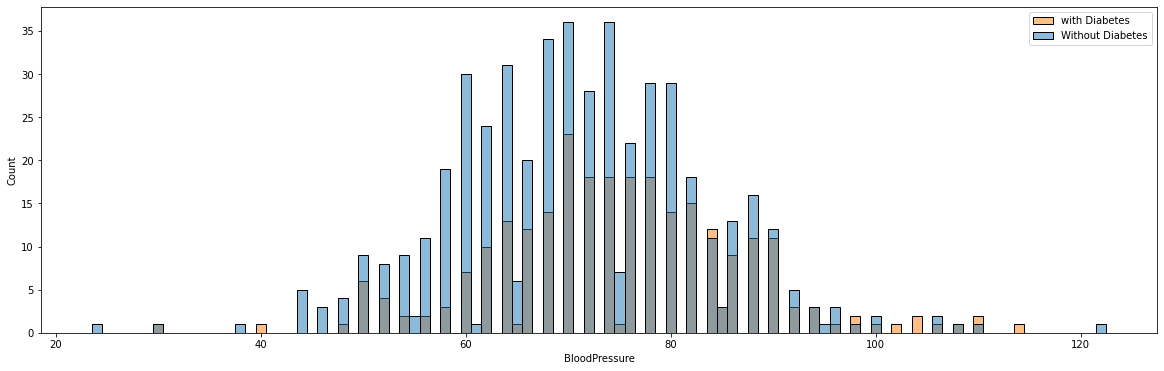

In [11]:
plt.figure(figsize=(20,6))
sns.histplot(x='BloodPressure',hue = 'Outcome', data=df, legend=True, discrete=True)
plt.legend(["with Diabetes", "Without Diabetes"])

> **Note**: from this graph we get that the numbert of people having diabetes increases with the increase of BloodPressure so people with high BloodPressure (more than 60) have more chance to get diabestes.

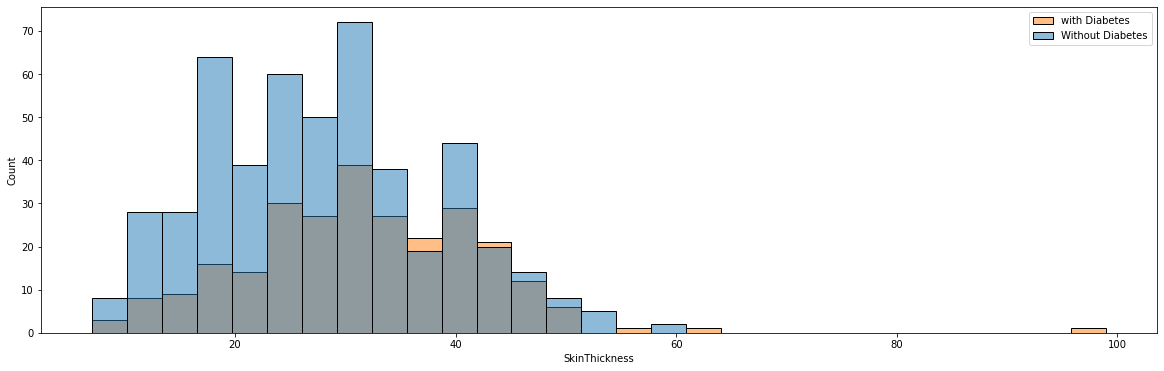

In [12]:
plt.figure(figsize=(20,6))
sns.histplot(x='SkinThickness',hue = 'Outcome', data=df, legend=True)
plt.legend(["with Diabetes", "Without Diabetes"])

> **Note**: from this graph we get that people with higher Skin Thickness (nearly 20 or more) have more chance to get diabetes and their chances of getting diabetes increases with the increase of their Skin Thickness.

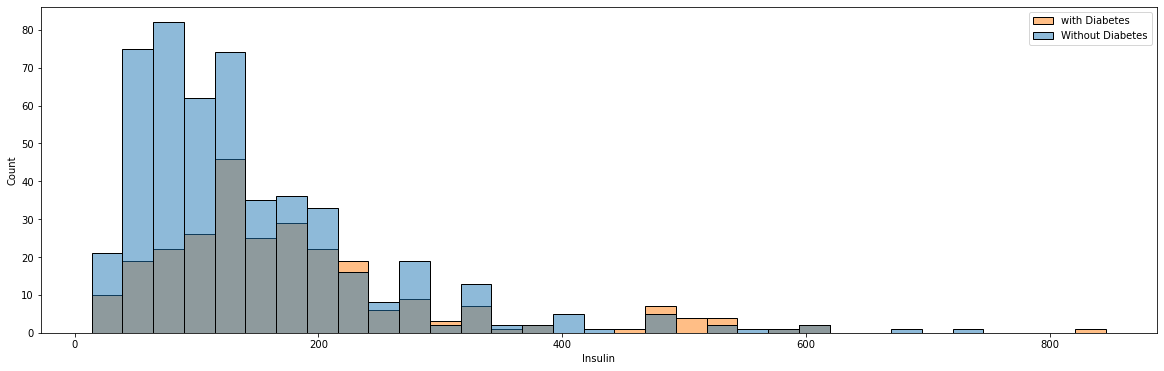

In [13]:
plt.figure(figsize=(20,6))
sns.histplot(x='Insulin',hue = 'Outcome', data=df, legend=True)
plt.legend(["with Diabetes", "Without Diabetes"])

> **Note**: from this graph we get that people with higher Insulin (nearly 100 or more) have more chance to get diabetes and their chances of getting diabetes increases with the increase of their Insulin.

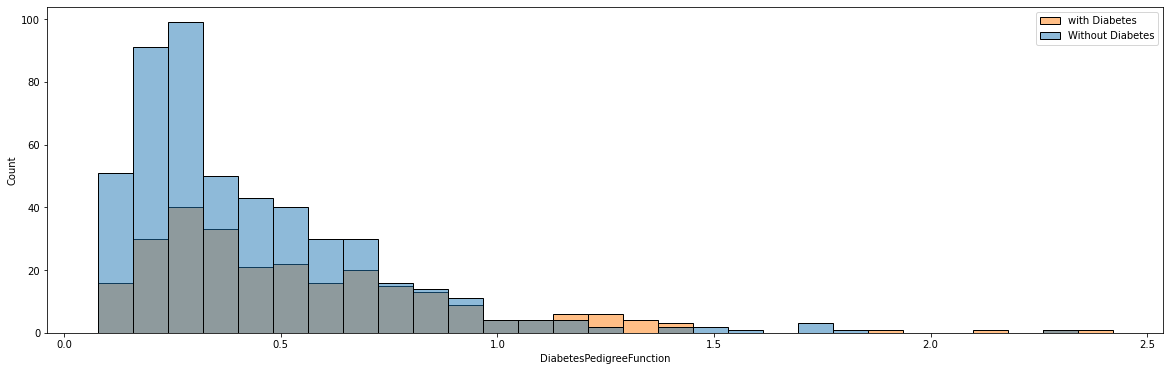

In [14]:
plt.figure(figsize=(20,6))
sns.histplot(x='DiabetesPedigreeFunction',hue = 'Outcome', data=df, legend=True)
plt.legend(["with Diabetes", "Without Diabetes"])

> **Note**: from this graph we get that the number of people that does not have diabetes decreases with the increase of Diabetes Pedigree Function so the higher your Diabetes Pedigree Function gets (more than 0.3) the more chance you have diabetes.

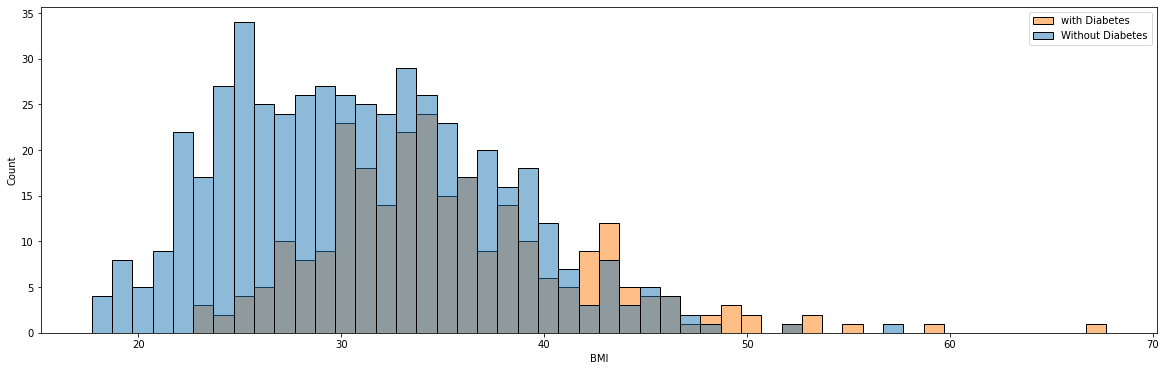

In [15]:
plt.figure(figsize=(20,6))
sns.histplot(x='BMI',hue = 'Outcome', data=df, legend=True, discrete=True)
plt.legend(["with Diabetes", "Without Diabetes"])

> **Note**: from this graph we get that people with higher Body Mass Index (more than 20) have more chance to get diabetes and their chances of getting diabetes increases with the increase of theirn Body Mass Index.

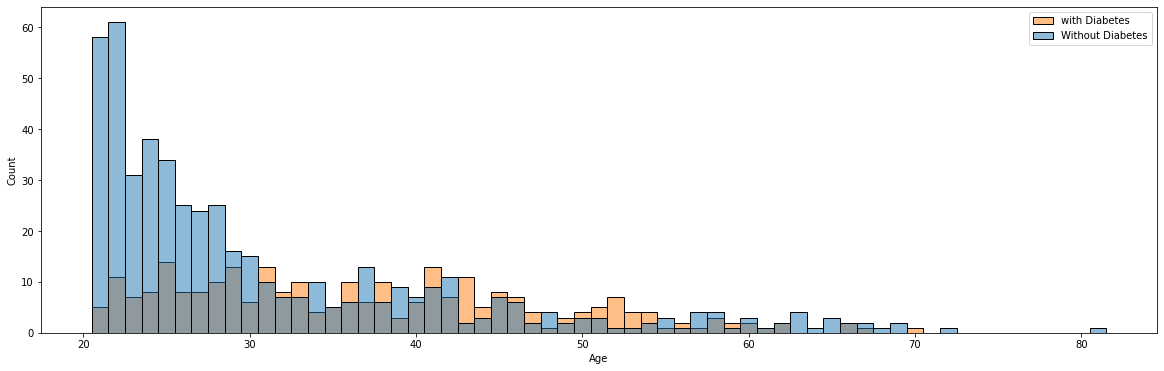

In [16]:
plt.figure(figsize=(20,6))
sns.histplot(x='Age',hue = 'Outcome', data=df, legend=True, discrete=True)
plt.legend(["with Diabetes", "Without Diabetes"])

> **Note**: from this graph we get that the numbert of people having diabetes nearly does not increase with the increase age but younger people have less chance to get diabestes because people in thier 20s that do not have diabetes are alot more than people that have diabetes in thier 20s

### How attributes relate to each other? which attributes contribute to the highest variances in data?

In [17]:
covariance = df.cov()
covariance

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.359351,12.752017,8.136163,3.134319,20.174748,0.556194,-0.039550,21.606375,0.351336
Glucose,12.752017,928.197783,81.715691,57.296027,1113.733569,48.774359,1.373496,95.755959,7.073406
BloodPressure,8.136163,81.715691,153.610793,23.187178,97.859504,22.919548,0.008555,46.714521,0.915869
SkinThickness,3.134319,57.296027,23.187178,111.575670,123.392999,34.186845,0.311236,18.220003,0.843245
Insulin,20.174748,1113.733569,97.859504,123.392999,13067.782285,85.524390,3.242862,166.259455,8.262672
BMI,0.556194,48.774359,22.919548,34.186845,85.524390,47.758560,0.361712,1.741695,1.029490
DiabetesPedigreeFunction,-0.039550,1.373496,0.008555,0.311236,3.242862,0.361712,0.110107,0.127848,0.027222
Age,21.606375,95.755959,46.714521,18.220003,166.259455,1.741695,0.127848,138.469603,1.327933
Outcome,0.351336,7.073406,0.915869,0.843245,8.262672,1.029490,0.027222,1.327933,0.227105


In [18]:
print("Here we show which attributes vary with which attributes the most:")
covariance.idxmax()

Here we show which attributes vary with which attributes the most:


Pregnancies                           Age
Glucose                           Insulin
BloodPressure               BloodPressure
SkinThickness                     Insulin
Insulin                           Insulin
BMI                               Insulin
DiabetesPedigreeFunction          Insulin
Age                               Insulin
Outcome                           Insulin
dtype: object

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca=PCA(n_components=9)
pca.fit(df)
pca.components_

array([[ 1.64371983e-03,  9.07876946e-02,  8.13181708e-03,
         9.85514340e-03,  9.95672677e-01,  6.86633896e-03,
         2.55107377e-04,  1.34124411e-02,  6.76356321e-04],
       [ 1.71037042e-02,  9.77637838e-01,  1.13928088e-01,
         6.94726012e-02, -9.27932067e-02,  5.59820250e-02,
         1.29241795e-03,  1.19668003e-01,  7.68122641e-03],
       [ 9.63837106e-02, -1.84556010e-01,  7.36499765e-01,
         3.02541492e-01, -7.30238725e-04,  1.41843889e-01,
        -2.05096040e-04,  5.50052152e-01,  2.89261618e-03],
       [-8.80192590e-02, -1.04734874e-02,  3.98233142e-02,
         7.45628086e-01, -1.78579852e-03,  3.68559630e-01,
         2.43244258e-03, -5.46577949e-01,  1.73669390e-03],
       [ 9.58390619e-02, -3.15930138e-02, -6.52192282e-01,
         4.71393507e-01, -4.54248107e-03,  6.23880142e-03,
         1.59451317e-03,  5.84957116e-01,  3.63564706e-03],
       [-3.09002966e-02,  2.74776156e-02,  1.32543972e-01,
         3.54074440e-01,  9.24555386e-04, -9.167162

In [21]:
pca.explained_variance_

array([1.31742248e+04, 8.50875625e+02, 1.82932951e+02, 1.14889019e+02,
       9.81728432e+01, 2.99621536e+01, 7.77189301e+00, 1.60060070e-01,
       1.01917939e-01])

In [22]:
print("Here we show the most effective::varying attributes by order")
for i in pca.components_:
   print(list(covariance)[np.argmax(i)])

Here we show the most effective::varying attributes by order
Insulin
Glucose
BloodPressure
SkinThickness
Age
SkinThickness
Pregnancies
Outcome
DiabetesPedigreeFunction


<a id='pre'></a>
## Building a Prediction Model (classification)


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Making a feature scaling
scaler = StandardScaler()
scaler.fit(df.drop('Outcome',axis=1))
scaled_features = scaler.transform(df.drop('Outcome',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.843346,-1.065710,-0.510913,-0.592171,-0.554379,-0.637143,-0.918469,-1.039450
1,-1.140244,0.510830,-2.610078,0.544619,0.093382,1.534806,5.477673,-0.019008
2,0.344246,-0.178906,0.134984,0.544619,0.093382,-0.999135,-0.815938,-0.274119
3,-0.249550,-1.427001,-1.802707,0.260422,-0.606900,-0.217233,-0.674203,-0.614266
4,1.828737,-0.211751,-1.802707,0.260422,-0.606900,0.405393,-1.017985,-0.359155


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Split the data into train and test data
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.33, random_state=42)

## Comparing the performance (Confusion matrix and classification report) of different classifiers (LR, KNN, SVM, DT and RF)

> **Note: we use grid search with a suitable range of values to adjust the hyperparameters of DT and SVM and for loop to adjust the k value of KNN**

## Using DT

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  KFold,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
dt = DecisionTreeClassifier()
kf = KFold()

dt_para = {
    'max_depth':[2, 4, 6, 8, 10],
    'min_samples_split' : [2, 4, 6, 8, 10],
    'min_samples_leaf' : [2, 4, 6, 8, 10]
}

grid_no_up = GridSearchCV(dt, param_grid=dt_para, cv=kf, scoring='accuracy', n_jobs=-1, refit=True)
grid_no_up.fit(X_train, y_train)

best_hyperparams = grid_no_up.best_params_
print('Best hyerparameters:', best_hyperparams)
print("-------------------------------------------------------------------")

best_CV_score = grid_no_up.best_score_
print('Best CV accuracy:', best_CV_score)

Best hyerparameters: {'max_depth': 4, 'min_samples_leaf': 8, 'min_samples_split': 2}
-------------------------------------------------------------------
Best CV accuracy: 0.7479916238339996


In [29]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=2)
dt = dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)

print(confusion_matrix(y_test, dt_pred))
print("-------------------------------------------------------------------")
print(classification_report(y_test, dt_pred))

[[139  32]
 [ 34  48]]
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       171
           1       0.60      0.59      0.59        82

    accuracy                           0.74       253
   macro avg       0.70      0.70      0.70       253
weighted avg       0.74      0.74      0.74       253



## Using RF

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators = 200)
rf = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print("-------------------------------------------------------------------")
print(classification_report(y_test, rf_pred))

[[142  29]
 [ 28  54]]
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       171
           1       0.65      0.66      0.65        82

    accuracy                           0.77       253
   macro avg       0.74      0.74      0.74       253
weighted avg       0.78      0.77      0.78       253



## Using LR

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print(confusion_matrix(y_test, lr_pred))
print("-------------------------------------------------------------------")
print(classification_report(y_test, lr_pred))

[[150  21]
 [ 32  50]]
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       171
           1       0.70      0.61      0.65        82

    accuracy                           0.79       253
   macro avg       0.76      0.74      0.75       253
weighted avg       0.79      0.79      0.79       253



## Using KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

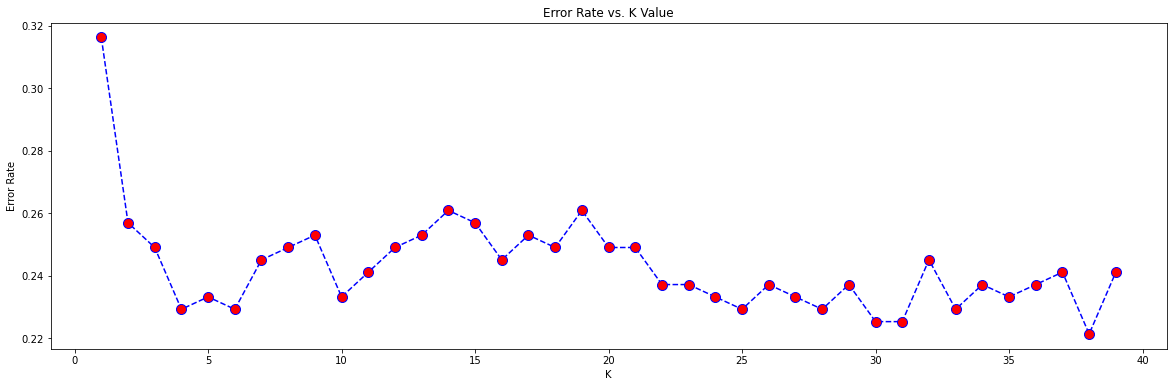

In [36]:
plt.figure(figsize=(20,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
knn = KNeighborsClassifier(n_neighbors=38)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(confusion_matrix(y_test, knn_pred))
print("-------------------------------------------------------------------")
print(classification_report(y_test, knn_pred))

[[159  12]
 [ 44  38]]
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       171
           1       0.76      0.46      0.58        82

    accuracy                           0.78       253
   macro avg       0.77      0.70      0.71       253
weighted avg       0.78      0.78      0.76       253



## Using SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svm = SVC()
kf = KFold()

svm_para = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

grid_no_up = GridSearchCV(svm, param_grid=svm_para, cv=kf, scoring='accuracy', n_jobs=-1, refit=True)
grid_no_up.fit(X_train, y_train)

best_hyperparams = grid_no_up.best_params_
print('Best hyerparameters:', best_hyperparams)
print("-------------------------------------------------------------------")

best_CV_score = grid_no_up.best_score_
print('Best CV accuracy:', best_CV_score)

Best hyerparameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
-------------------------------------------------------------------
Best CV accuracy: 0.7559299447934513


In [40]:
svm = SVC(C=1000, gamma=0.001, kernel='rbf')
svm.fit(X_train,y_train)
svm_pred = svm.predict(X_test)

print(confusion_matrix(y_test, svm_pred))
print("-------------------------------------------------------------------")
print(classification_report(y_test, svm_pred))

[[148  23]
 [ 35  47]]
-------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       171
           1       0.67      0.57      0.62        82

    accuracy                           0.77       253
   macro avg       0.74      0.72      0.73       253
weighted avg       0.76      0.77      0.77       253



<a id='conclusions'></a>
## Conclusions

> We denote from the graphs that every attribute has its own 
effect on the chance that a person has diabetes .
We observed that an increase in number of pregnancies 
is inversely proportional to the chance of having diabetes.
We can say that as we observed a decrease in the count of diabetes
for number of pregnancies higher than 2 .
And for people who have glucose higher than 140-150 ,
they have more chance of having diabetes.
We aslo concluded from the blood pressure graph that the
the increase in blood pressure is directly proportional
to the chance a person has diabetes , also people with 
blood pressue less than 60 have very low chance of having diabetes .
People with higher skin thickness have more chance of having
diabetes than people with lower skin thickness.The chances increase 
even more after skin thickness of 40.
Furthermore ,people with higher insulin have more chance of 
having diabetes especially for insulin higher than 100.
The number of people that does not have diabetes decreases with the 
increase of Diabetes Pedigree Function so the higher 
your Diabetes Pedigree Function gets specially after 0.6 
where you have more chance that you have diabetes.
People with higher body mass index of 22 or higher have more chance
of having diabetes , the probability increases even more for values 
starting from 32-34.
 Young people until age of 30 have signifiantly less chance of having 
diabetes than elder people.

> So in conclusion a person with high chance of having diabetes is a person with:
-More than 2 pregnancies
-Glucose concentraion of 140-150
-Have higher than 60 blood pressue 
-Have high skin thickness of 40 or higher
-Have high insulin levels , specially over 100
-Have body mass index of 22 or higher
-Diabetes Pedigree Function high specially after 
-Being an elderly person at least 30 years old

> We tried several values of K neighbours to obsereve
the most optimum value for K , we concluded that k=38 
would be the best value as it gave us the least Error Rate.